# Project 2 - Data Mining (DIZON, TANG, TEE)
In this notebook, we will be exploring on the Dataset number 9 which . We will be focusing on formulating EDAs and performing a data mining technique

## Importing Libraries
To start, we will be first importing the libraries that will be used to help us analyze the given data. The following libraries will be used:

1.   **Numpy**
2.   **Pandas**
3.  **Matplotlib**
4. **SciPy**


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Dataset Representation

To start we will first load the data and give an overview or description of the existing variables, observation, or even the general structure of the data.

In [15]:
df = pd.read_csv('Dataset9.csv')
# Removes the Unnamed: 0 Column
df.drop('Unnamed: 0', inplace=True, axis=1)
df


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,3.0,3.0,5.0,1.0,2.0,3.0,3.0,4.0,NaN,1.0,...,NaN,1.0,4.0,3.0,NaN,5.0,5.0,3.0,3.0,3.0
1,5.0,5.0,1.0,5.0,4.0,2.0,2.0,3.0,2.0,3.0,...,3.0,1.0,4.0,1.0,4.0,5.0,5.0,3.0,5.0,2.0
2,4.0,4.0,5.0,5.0,4.0,1.0,5.0,3.0,1.0,5.0,...,2.0,NaN,4.0,5.0,2.0,1.0,NaN,1.0,5.0,4.0
3,3.0,3.0,5.0,5.0,2.0,3.0,NaN,1.0,2.0,5.0,...,5.0,4.0,3.0,1.0,3.0,NaN,5.0,NaN,5.0,4.0
4,3.0,5.0,4.0,1.0,5.0,5.0,2.0,1.0,NaN,3.0,...,NaN,2.0,NaN,2.0,4.0,5.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,3.0,4.0,3.0,1.0,3.0,4.0,2.0,1.0,3.0,...,3.0,1.0,5.0,1.0,5.0,3.0,4.0,NaN,4.0,3.0
96,4.0,4.0,1.0,5.0,1.0,1.0,NaN,3.0,3.0,5.0,...,2.0,4.0,2.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0
97,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0,2.0,...,3.0,5.0,2.0,3.0,5.0,NaN,NaN,1.0,5.0,2.0
98,1.0,5.0,5.0,NaN,1.0,4.0,3.0,4.0,5.0,2.0,...,1.0,3.0,1.0,4.0,2.0,NaN,NaN,NaN,5.0,5.0


### Description of Variables, Observation, and Structure of Data

Based on the structure of the data, it can be inferred that **Dataset 9** is a **collaborative filtering** dataset. With this, we presume that the `300` variables represent the ratings of people to a movie. While the `100` observation are the movies being rated by a specific person.


# 2. Exploratory Data Analysis

After identifying what the dataset is, we move forward to formulating EDA questions to further understand the dataset. These EDAs will focus mostly on looking for the central tendencies, dispersion, and possible correlations found in the dataset. The EDA Questions are the ff:

1. Is there a correlation between the given ratings for the set of movies of Users `0` and `299`? 
2. Do Movies `3` and `5` significantly differ based on the scores given by the users?

## 1. Is there a correlation between the given ratings for the set of movies of Users `0` and `299`? 

In this EDA, we would be comparing the ratings of 2 users for the entire movie set in order to determine whether there is a possible correlation between these users in terms of there preferences in movies.

### Numerical Summaries

Here, we will be looking for the measure of central tendencies, dispersion, and possible correlation between the rating and the score.

In [29]:
# Filtered data to only User 0 & 299
df_eda1 = df[['0', '299']]
df_eda1

,0,299
0,3.0,3.0
1,5.0,2.0
2,4.0,4.0
3,3.0,4.0
4,3.0,1.0
...,...,...
95,5.0,3.0
96,4.0,5.0
97,5.0,2.0
98,1.0,5.0


In [32]:
df_eda1_ct = df_eda1.agg({'0':["mean", "median", "std"], '299': ["mean", "median", "std"]})
df_eda1_ct

,0,299
mean,2.932584,3.204819
median,3.000000,3.000000
std,1.404520,1.256777


### Observation

With this, we could see that just by looking at the central tendencies, it would seem like that the User `0` and `299` are similar. It should be taken note since the rating only ranges from 1-5, it would be more likely, to have `3.00` as the median of both the users.

Now, we compute whether there is a correlation between user `0` and user `299`

In [33]:
df_eda1_corr = df_eda1['0'].corr(df_eda1['299'])
df_eda1_corr

-0.11959513396319915

### Observation

However, by computing the Pearson Correlation between User `0` and User `299`, we could see that there is a negatively very weak correlation `-0.12`. 


## Visualization

We move forward to visualizing the numerical summaries obtained above.

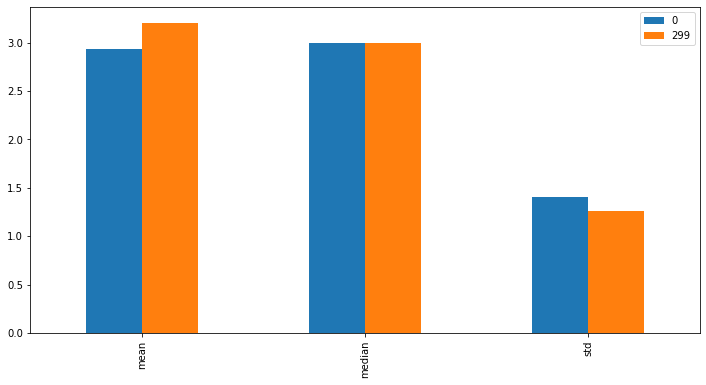

In [34]:
df_eda1_bar = df_eda1_ct

viz_eda1 = df_eda1_bar.plot.bar(figsize=(12,6))
plt.show()

In this visualization, we could see a side-by-side comparison between the central tendencies of Users `0` and `299`